# Table of Contents

1. [Load project](#Load-project)
2. [Import Combined DLC CSV](#import-combined-dlc-csv)
3. [Create time-binned dictionary](##create-time-binned-dictionary)
4. [Exclusion Criteria](#exclusion-criteria)
    1. [Save new preprocessed csv post exclusions](#Save-new-preprocessed-csv-post-exclusions)
    2. [Subset the Time-Binned Dictionary based on Valid Sessions](#Subset-the-Time-Binned-Dictionary-based-on-Valid-Sessions)
5. [Plot 1: Heatmap Representations](#plot-1-heatmap-representations)
    1. [Heatmap Representations across all Genotypes](#EXTRA:-Heatmap-Representations-across-all-Genotypes-(when-multiple-genotypes))
6. [Shannon's Entropy](#shannons-entropy)
    1. [Plot 2: Plotting Shannon's Entropy across Sessions](#plot-2-plotting-shannons-entropy-across-sessions-mice)
    2. [Statistical tests - Entropy](#Statistical-tests---Entropy)
7. [Proportion of Region-based usage across Time bins](#Proportion-of-Region-based-usage-across-Time-bins)
    1. [Plot 3: Proportion of usage per Region across time](#plot-3-proportion-of-usage-per-region-across-time)
    2. [Statistical tests - region usage](#Statistical-tests---region-usage)
    3. [Plot 4: Proportion of usage across all Regions](#Plot-4:-Proportion-of-usage-across-all-Regions)
8. [Bout-Level Success metrics](#Bout-Level-Success-Metrics)
    1. [Plot 5: Cumulative Successful Bout Percentage](#Plot-5:-Cumulative-Successful-Bout-Percentage)
    2. [Statistical tests - genotypes](#Statistical-tests---genotypes)
    3. [Plot 6: Time-based Successful Bout Percentage](#Plot-6:-Time-based-Successful-Bout-Percentage)
    4. [Statistical tests - time-based](#Statistical-tests---time-based)
9. [Plot 7: Deviation from Reward Path and Velocity](#Plot-7:-Deviation-from-Reward-Path-and-Velocity)
    1. [Deviation from Reward Path and Velocity for all Genotypes](#Deviation-from-Reward-Path-and-Velocity-for-all-Genotypes)

# Load project

In [16]:
from pathlib import Path
import pandas as pd
from compass_labyrinth import load_project


project_path = Path(r'D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2')

config, cohort_metadata = load_project(project_path=project_path)
config

{'bodyparts': ['nose',
  'sternum',
  'belly',
  'tailbase',
  'leftflank',
  'rightflank'],
 'creation_date_time': '2025-11-05T11:56:56.417307',
 'dlc_scorer': 'DLC_resnet50_LabyrinthMar13shuffle1_1000000',
 'experimental_groups': ['WT', 'AppSAA'],
 'file_ext': '.shp',
 'palette': 'grey',
 'project_name': 'AppSAA_DSI_CoMPASS_Test_2',
 'project_path_full': 'D:\\Gladstone Dropbox\\Palop Lab\\Patrick\\DeepLabCut Projects\\AppSAA_DSI_CoMPASS_Test_2',
 'session_names': ['Session0001',
  'Session0002',
  'Session0003',
  'Session0004',
  'Session0005',
  'Session0006',
  'Session0007',
  'Session0008',
  'Session0009',
  'Session0010',
  'Session0011'],
 'trial_type': 'Labyrinth_DSI',
 'video_type': '.mp4'}

In [17]:
cohort_metadata

,Run Date,Time Of Day,Rack Location,Computer,Noldus Chamber,Camera #,Noldus Trial,Session #,ID,Name,...,Status,Line,Genotype,Birth Date,Age (months),Housing ID,Transmitter #,Exclude Trial,NOTES,Behavior Notes
0,2025-10-21T00:00:00,NaN,TL,1,BL,3,1,1,70791,895,...,Available,LG124KI3,WT,2024-01-02T00:00:00,22m3d,H-10593-17,"7,8",NaN,Both EEG look pretty noisy,Entered; ate all pellets
1,2025-10-21T00:00:00,NaN,TR,1,BR,4,1,2,70799,927,...,Available,LG124KI3,AppSAA,2024-01-11T00:00:00,21m25d,H-10605-17,"5,6",NaN,Signal looks good,Didn't finish all pellet
2,2025-10-22T00:00:00,NaN,BL,1,TL,1,2,3,71234,942,...,Available,LG124KI3,AppSAA,2023-12-18T00:00:00,22m18d,H-10699-17,"1,2",NaN,Signal looks good,Video may have froze around 6 hrs; mouse enter...
3,2025-10-22T00:00:00,NaN,TL,1,BL,3,2,4,71238,946,...,Available,LG124KI3,WT,2023-12-18T00:00:00,22m18d,H-10699-17,"7,8",NaN,Signal looks good,Ate pellts really fast
4,2025-10-22T00:00:00,NaN,TR,1,BR,4,2,5,70828,917,...,Available,LG124KI3,AppSAA,2024-02-06T00:00:00,20m30d,H-10613-17,"5,6",NaN,Signal looks good,Ate pellts really fast
5,2025-10-30T00:00:00,NaN,BL,1,TL,1,3,6,71363,949,...,Available,LG124KI3,WT,2024-01-23T00:00:00,21m13d,H-10774-17,"1,2",NaN,Signal looks good,Entered; ate all pellets
6,2025-10-30T00:00:00,NaN,BR,1,TR,2,3,7,71408,981,...,Available,LG124KI3,AppSAA,2024-01-26T00:00:00,21m10d,H-10790-17,"3,4",NaN,Signal looks good,Entered; ate all pellets
7,2025-10-30T00:00:00,NaN,TL,1,BL,3,3,8,71401,967,...,Available,LG124KI3,AppSAA,2024-01-27T00:00:00,21m9d,H-10787-17,"7,8",NaN,Signal looks good,Entered; ate all pellets
8,2025-10-30T00:00:00,NaN,TR,1,BR,4,3,9,70789,893,...,Available,LG124KI3,WT,2024-01-02T00:00:00,22m3d,H-10593-17,"5,6",NaN,Hippocampus channel is quite noisy,Entered; ate all pellets
9,2025-11-04T00:00:00,NaN,BL,1,TL,1,4,10,73995,1082,...,Available,LG124KI3,AppSAA,2024-04-04T00:00:00,19m1d,H-11259-17,"1,2",NaN,Signal looks good,Started 5:59:11pm


# Import Combined DLC CSV

In [20]:
df_all_csv = pd.read_csv(project_path / "csvs" / "combined" / "Preprocessed_combined_file.csv")
df_all_csv

,x,y,Grid Number,likelihood,S_no,Region,Session,Genotype,Sex,NodeType,Velocity
0,265.426300,877.355591,47,0.647991,4159,entry_zone,1,WT,Female,Entry Nodes,0.000000
1,258.073059,870.970032,47,0.953051,4161,entry_zone,1,WT,Female,Entry Nodes,48.694332
2,258.764191,869.953430,47,0.973512,4162,entry_zone,1,WT,Female,Entry Nodes,6.146425
3,259.499451,869.113159,47,0.945773,4163,entry_zone,1,WT,Female,Entry Nodes,5.582702
4,257.825745,868.493469,47,0.957239,4164,entry_zone,1,WT,Female,Entry Nodes,8.923715
...,...,...,...,...,...,...,...,...,...,...,...
605686,256.991150,844.630615,47,0.995856,218482,entry_zone,11,WT,Male,Entry Nodes,360.397450
605687,257.961243,845.421814,47,0.997331,218483,entry_zone,11,WT,Male,Entry Nodes,6.259144
605688,253.797043,845.797302,47,0.995143,218484,entry_zone,11,WT,Male,Entry Nodes,20.905473
605689,252.432648,850.713013,47,0.994392,218485,entry_zone,11,WT,Male,Entry Nodes,25.507736


# Create Time-Binned Dictionary

This workflow bins data from each session into defined intervals and calculates normalized region occupancy for each genotype. Each pivot table summarizes the proportion of time spent in each region across all sessions for a given bin.

### Recommended Use:
1. Ensure `df_all_csv` contains 'Session', 'Genotype', and 'Region' columns.
2. Set `LOWER_LIMIT` and `UPPER_LIMIT` to define the full range of timepoints to analyze.
3. Set `BIN_SIZE` (used as `difference`) to determine the duration of each bin (e.g., 10000).
4. Provide `region_lengths` as a dictionary mapping region names to their total grid lengths.
5. The function returns a dictionary of pivot tables (one per genotype), useful for heatmap plotting.

Let's generate pivot tables for each genotype and time bin:

In [21]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import generate_region_heatmap_pivots


pivot_dict = generate_region_heatmap_pivots(
    df=df_all_csv,
    lower_lim=0,        # Start of time window
    upper_lim=80000,    # End of time window
    difference=10000,   # Bin width in timepoints
)
pivot_dict

{'WT': [Session             1    2    3         4    5         6    7    8         9   \
  Region                                                                          
  dead_ends     0.030339  NaN  NaN  0.054333  NaN  0.081669  NaN  NaN  0.053077   
  entry_zone    0.605887  NaN  NaN  0.338011  NaN  0.340375  NaN  NaN  0.693498   
  loops         0.029726  NaN  NaN  0.061237  NaN  0.080952  NaN  NaN  0.068812   
  neutral_zone  0.061194  NaN  NaN  0.163076  NaN  0.224073  NaN  NaN  0.033347   
  reward_path   0.084874  NaN  NaN  0.126815  NaN  0.135437  NaN  NaN  0.112156   
  target_zone   0.187979  NaN  NaN  0.256528  NaN  0.137494  NaN  NaN  0.039111   
  
  Session        10        11  
  Region                       
  dead_ends     NaN   0.05265  
  entry_zone    NaN  0.261629  
  loops         NaN   0.04949  
  neutral_zone  NaN  0.090518  
  reward_path   NaN  0.114275  
  target_zone   NaN  0.431438  ,
  Session             1    2    3         4    5         6    7    8  

# Exclusion Criteria

This workflow quantifies target zone engagement across bouts and sessions, plots the relationship between target usage and session duration, and interactively excludes low-performing sessions based on user-defined thresholds.

### Recommended Use:
1. Ensure `df_all_csv` contains 'Session', 'Genotype', 'Grid.Number', and 'Bout_Index' columns.
2. Run `compute_frames_per_session()` to get the number of frames per session.
3. Use `compute_target_zone_usage()` to calculate per-bout usage for a specified region; set `region` and `difference` accordingly.
4. Summarize target usage at the session level using `summarize_target_usage()` with `mouseinfo` to add sex/genotype metadata.
5. Visualize the relationship between number of frames and target usage using `plot_target_usage_vs_frames()`.
6. Call `exclude_low_performing_sessions()` to interactively remove sessions below usage and duration thresholds.

Example Workflow:

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\target_usage_vs_frames.png


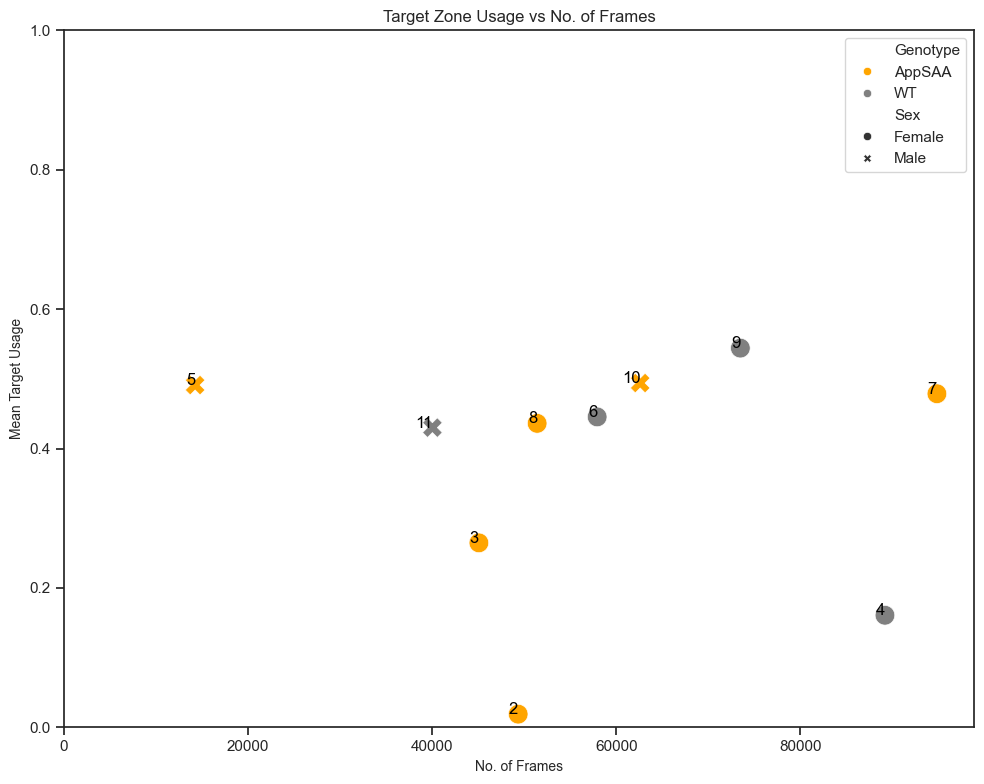


Excluding 0 session(s): []
Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\target_usage_vs_frames_exclusions.png


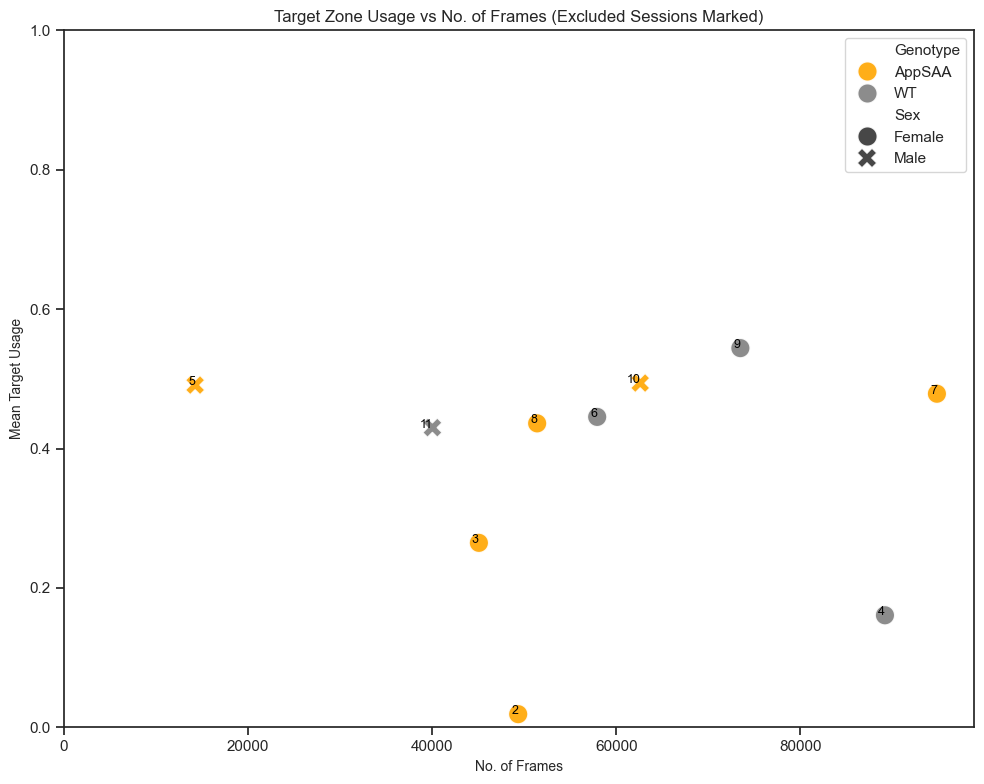

In [ ]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    compute_frames_per_session,
    compute_target_zone_usage,
    summarize_target_usage,
    plot_target_usage_vs_frames,
    exclude_low_performing_sessions,
    plot_target_usage_with_exclusions
)


# Set these values
BIN_SIZE = 10000               # BASED ON THE TIME-BINNED DICTIONARY
REGION = "target_zone"         # Region to evaluate usage

# Step 1: Total frames per session
frames_df = compute_frames_per_session(df=df_all_csv)

# Step 2: Target zone usage per bout
region_target = compute_target_zone_usage(
    df=df_all_csv,
    pivot_dict=pivot_dict,
    region=REGION,
    difference=BIN_SIZE,
)

# Step 3: Session-level summary
region_summary = summarize_target_usage(
    region_target=region_target,
    frames_df=frames_df,
    cohort_metadata=cohort_metadata,
)

# Step 4: Visualize usage vs. session duration
plot_target_usage_vs_frames(
    config=config,
    summary_df=region_summary,
)

# Step 5: Interactive exclusion based on usage and frame thresholds
df_all_csv = exclude_low_performing_sessions(
    df=df_all_csv,
    summary_df=region_summary,
    usage_threshold=None, # None: interactive thresholding
    min_frames=None, # None: interactive thresholding
)

# Step 6: Replot the target usage v/s frames plot with the excluded sessions 'X' out
sessions_to_exclude = region_summary.loc[
    ~region_summary['Session'].isin(df_all_csv['Session'])
]['Session'].tolist()

plot_target_usage_with_exclusions(
    config=config,
    summary_df=region_summary,
    sessions_to_exclude=sessions_to_exclude,
)

### Save new preprocessed csv post exclusions

In [24]:
# Define path to the 'csvs' folder and final output file
base_path = Path(config["project_path_full"])
output_file = base_path / "csvs" / "combined" / "Preprocessed_combined_file_exclusions.csv"

# Save the DataFrame
df_all_csv.to_csv(output_file, index=False)

### Subset the Time-Binned Dictionary based on Valid Sessions

In [25]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import subset_pivot_dict_sessions


pivot_dict = subset_pivot_dict_sessions(pivot_dict, df_all_csv)
pivot_dict

{'WT': [Session             4         6         9         11
  Region                                              
  dead_ends     0.054333  0.081669  0.053077   0.05265
  entry_zone    0.338011  0.340375  0.693498  0.261629
  loops         0.061237  0.080952  0.068812   0.04949
  neutral_zone  0.163076  0.224073  0.033347  0.090518
  reward_path   0.126815  0.135437  0.112156  0.114275
  target_zone   0.256528  0.137494  0.039111  0.431438,
  Session             4         6         9         11
  Region                                              
  dead_ends     0.019551  0.081004  0.033298  0.035633
  entry_zone    0.041056  0.209749  0.617804  0.076603
  loops         0.015609  0.066382  0.033568  0.019155
  neutral_zone  0.042229   0.12585  0.015555  0.074475
  reward_path   0.432675  0.164744  0.064459  0.058543
  target_zone   0.448881  0.352271  0.235316  0.735592,
  Session        4         6         9         11
  Region                                         
  dead_ends 

# Plot 1: Heatmap Representations

Use this function to visualize how region occupancy evolves over time for a specific genotype or group in your behavioral dataset. Each heatmap corresponds to a fixed-length time bin and shows normalized region occupancy per session, allowing for temporal comparison.

### Recommended Use:
1. Ensure that `pivot_dict` is generated using `generate_region_heatmap_pivots()`.
2. Specify the genotype/group you want to plot (e.g., 'WT').
3. Define the time binning parameters: `lower_lim`, `upper_lim`, and `difference`.
4. Optionally set a custom region order and vmax for consistent color scaling.
5. Run the function to display vertically stacked heatmaps across time bins.

Example Workflow:

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\region_heatmaps_WT.pdf


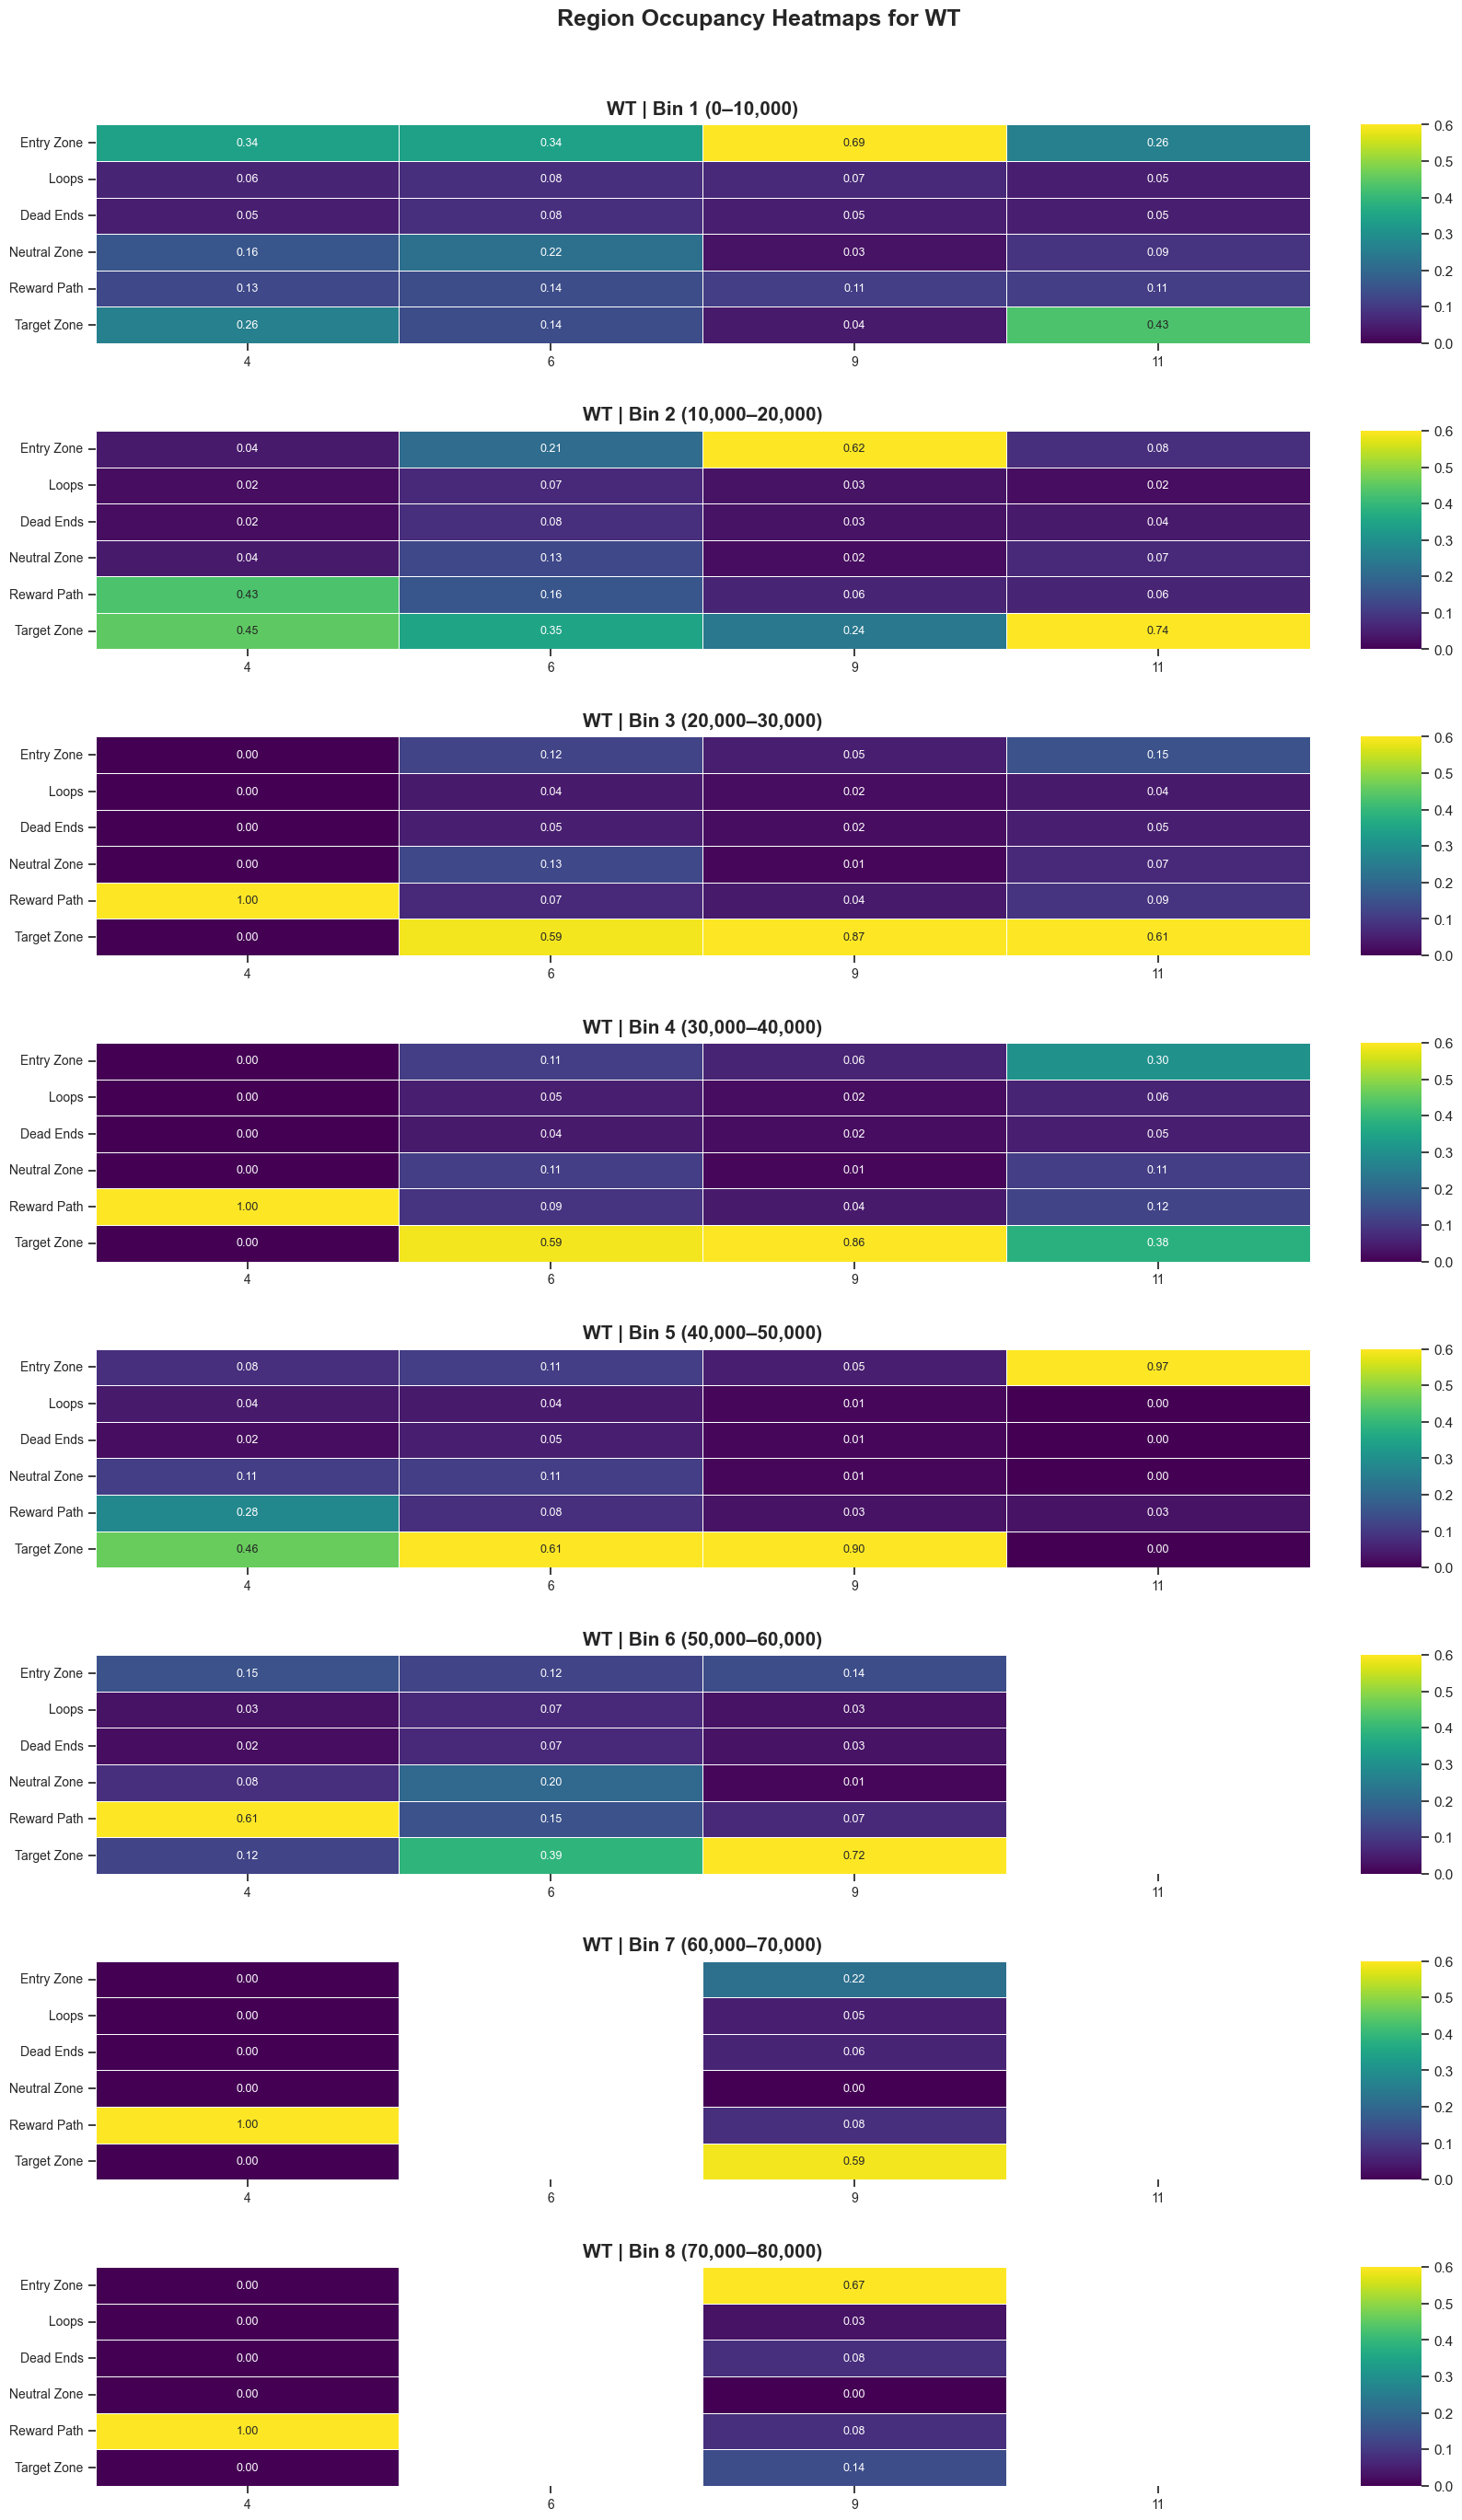

In [26]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    get_max_session_row_bracket,
    plot_region_heatmaps,
)


# Set these values
GENOTYPE_DISP = 'WT'
LOWER_LIMIT = 0       # lower limit for bins 
BIN_SIZE = 10000      # bin size for the heatmap plot
VMAX = 0.6            # max range on colorbar

UPPER_LIMIT = get_max_session_row_bracket(df_all_csv)  # upper limit for bins 

# Store valid sessions post exclusion, specific to the genotype/group wanting to visualize
valid_sessions = df_all_csv[df_all_csv.Genotype == GENOTYPE_DISP]['Session'].unique().tolist()
if len(valid_sessions) == 0:
    raise ValueError("Valid sessions list is empty! Choose a valid Genotype.")

# Plot the region-based heatmap
plot_region_heatmaps(
    config=config,
    pivot_dict=pivot_dict,
    group_name=GENOTYPE_DISP,
    lower_lim=LOWER_LIMIT,
    upper_lim=UPPER_LIMIT,
    difference=BIN_SIZE,
    vmax=VMAX,
    included_sessions=valid_sessions,
)

### EXTRA: Heatmap Representations across all Genotypes (when multiple genotypes)

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\region_heatmaps_all_genotypes.pdf


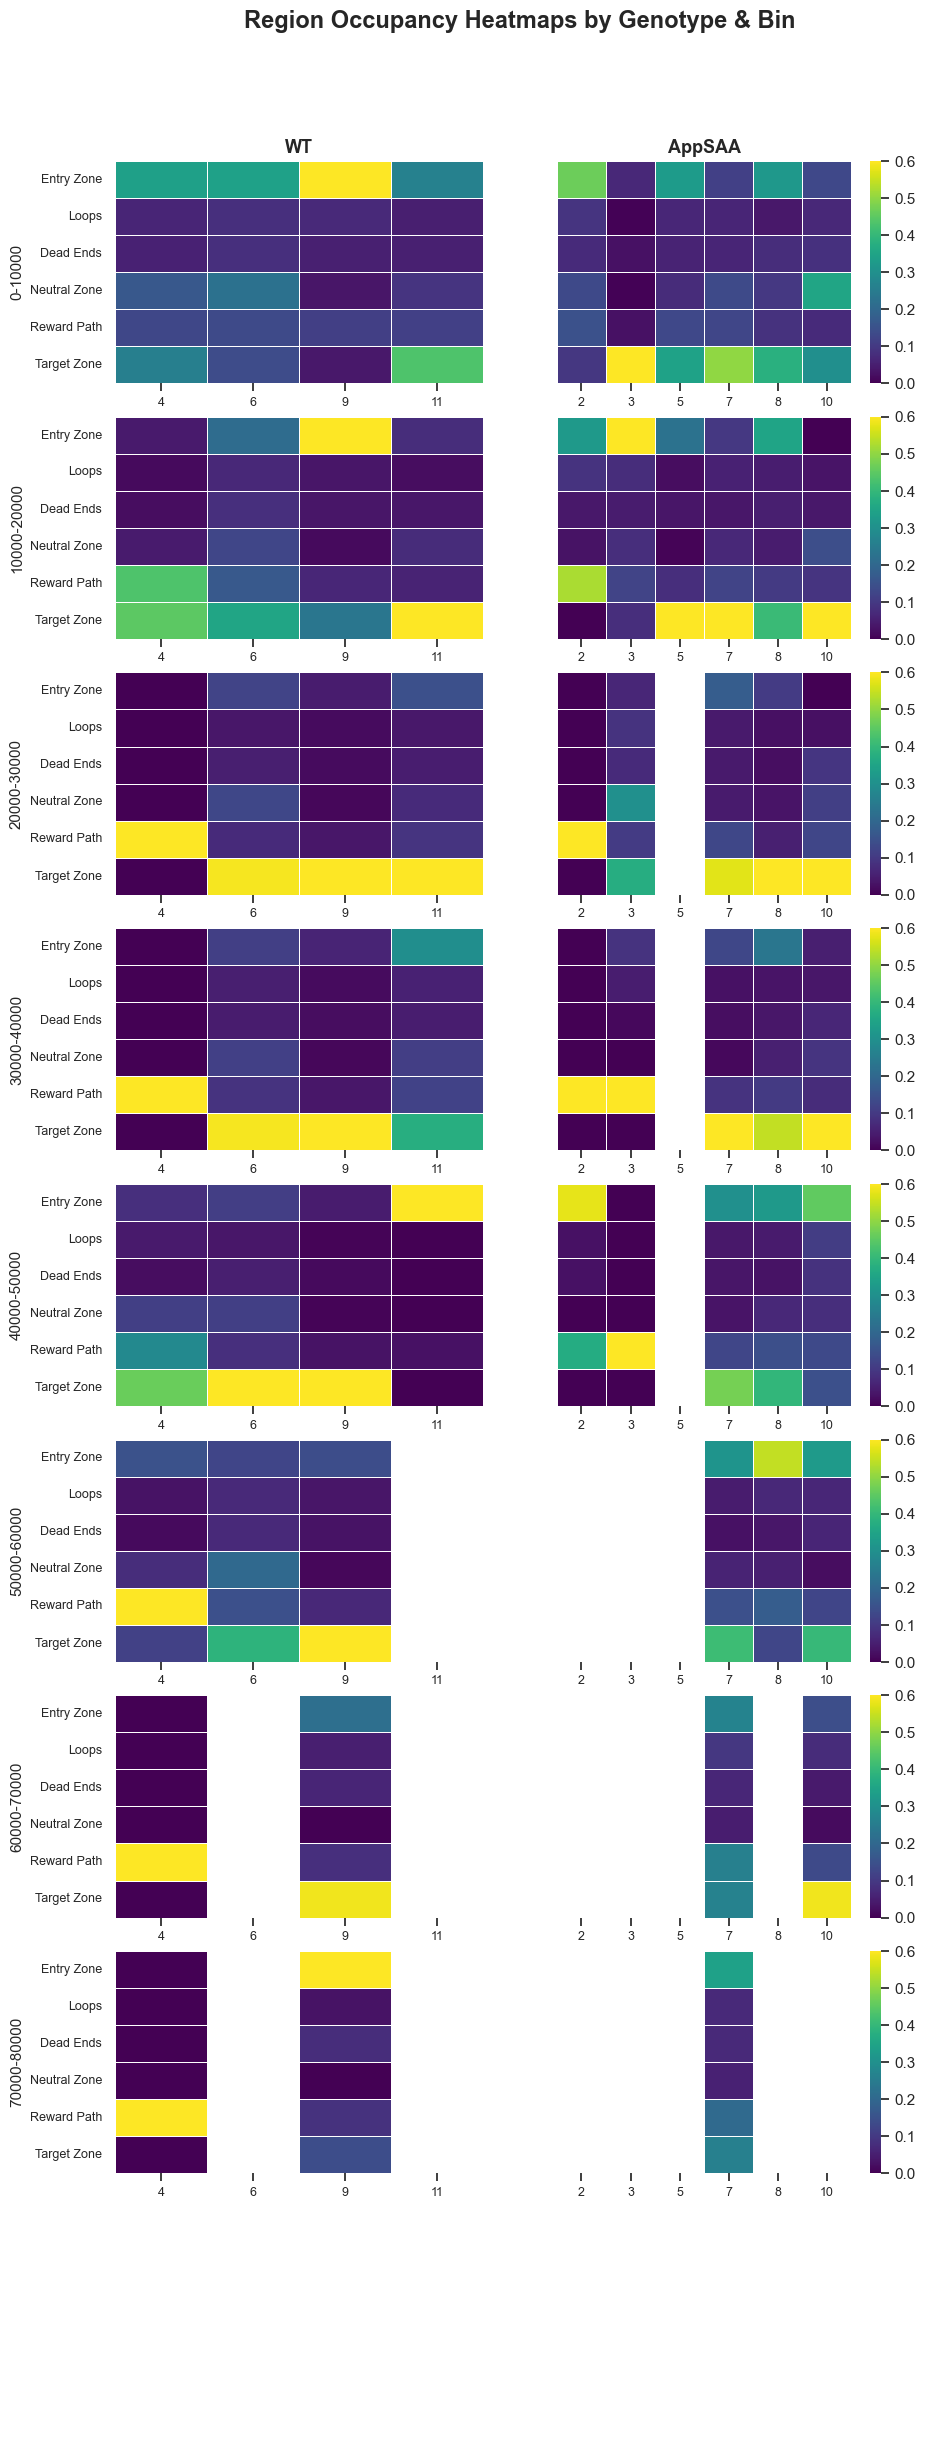

In [27]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_region_heatmaps_all_genotypes


# Set these values
included_genotypes = ["WT", "AppSAA"]  # add more genotypes
LOWER_LIMIT = 0              # lower limit for bins 
BIN_SIZE = 10000             # bin size for the heatmap plot
VMAX = 0.6                   # Max. range on colorbar

UPPER_LIMIT = get_max_session_row_bracket(df_all_csv) # upper limit for bins 

plot_region_heatmaps_all_genotypes(
    config=config,
    pivot_dict=pivot_dict,
    df_all_csv=df_all_csv, 
    lower_lim=LOWER_LIMIT,
    upper_lim=UPPER_LIMIT,
    difference=BIN_SIZE,
    included_genotypes=included_genotypes,
    spacing_w=0.2,
    spacing_h=0.15,
    show_colorbar=True,
    vmax=VMAX
)

# Shannon's Entropy

This function calculates Shannon entropy over time, reflecting the diversity of region occupancy for each mouse/session within each time bin. A higher entropy indicates more distributed (less selective) region occupancy, whereas lower entropy suggests focused behavior within fewer regions.

### Recommended Use:
1. Ensure `pivot_dict` has been generated using `generate_region_heatmap_pivots()`.
2. Ensure `cohort_metadata` includes metadata 

In [28]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import compute_shannon_entropy_per_bin


# Compute entropy values
entropy_df = compute_shannon_entropy_per_bin(
    pivot_dict=pivot_dict, 
    df_all_csv=df_all_csv,
    bin_size=BIN_SIZE   # As used and specified in pivot_dict creation
)
entropy_df

,Session,Bin,Entropy,Genotype
0,2,10000,2.209920,AppSAA
1,2,20000,1.650002,AppSAA
2,2,30000,0.000000,AppSAA
3,2,40000,0.000000,AppSAA
4,2,50000,1.266345,AppSAA
...,...,...,...,...
75,11,40000,2.202678,WT
76,11,50000,0.175823,WT
77,11,60000,NaN,WT
78,11,70000,NaN,WT


## Plot 2: Plotting Shannon's Entropy across Sessions (/Mice)

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\shannon_entropy.pdf


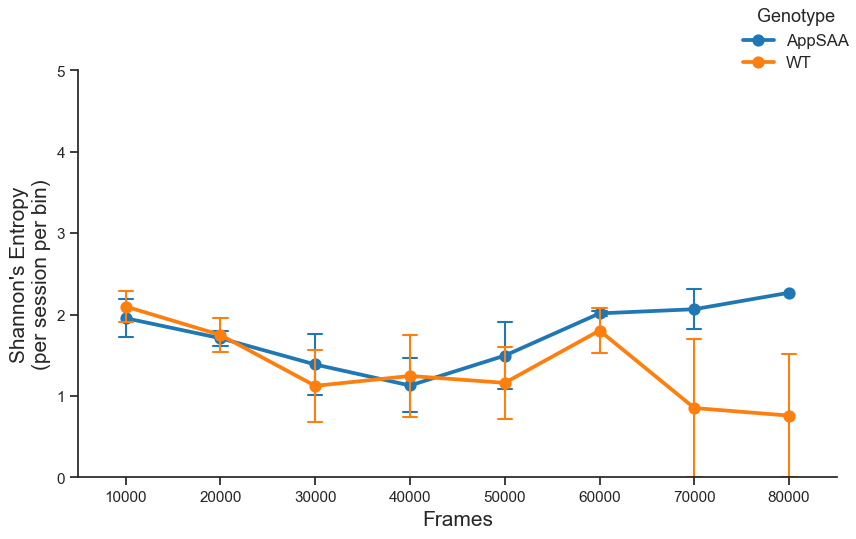

In [29]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_entropy_over_bins


# Plot entropy over time
plot_entropy_over_bins(
    config=config,
    entropy_df=entropy_df,
)

### Statistical tests - Entropy

In [30]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    run_entropy_anova,
    run_fdr_pairwise_tests,
    run_mixed_model_per_genotype_pair,
)

## Need more than one genotype to run these

# Repeated Measures ANOVA
anova_result = run_entropy_anova(entropy_df)

# Pairwise t-tests + FDR correction (per bin, per genotype pair)
fdr_results = run_fdr_pairwise_tests(entropy_df)
print(fdr_results)

# Run per-pair mixed models
mixed_results, interaction_table = run_mixed_model_per_genotype_pair(entropy_df)

# View pairwise Bin × Genotype interaction summary
print(interaction_table)

Repeated Measures ANOVA (within-subject Bin):
              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Bin  5.9664 7.0000 63.0000 0.0000

     Bin  Group1 Group2    t-stat     raw-p     FDR-p  Significant
0  10000  AppSAA     WT -0.470784  0.650368  0.998821        False
1  20000  AppSAA     WT -0.173372  0.870418  0.998821        False
2  30000  AppSAA     WT  0.053701  0.958695  0.998821        False
3  40000  AppSAA     WT -0.509668  0.629916  0.998821        False
4  50000  AppSAA     WT  0.141255  0.891500  0.998821        False
5  60000  AppSAA     WT -0.517985  0.620123  0.998821        False
6  70000  AppSAA     WT  0.429600  0.679375  0.998821        False
7  80000  AppSAA     WT -0.001528  0.998821  0.998821        False

 Genotype Pair: AppSAA vs WT
                Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      Entropy 
No. Observations:       60           Method:                  REML    
No

# Proportion of Region-based usage across Time bins

This function computes the proportion of usage of a specified region across sequential time bins, grouped by session and genotype, using the binned pivot tables.

### Recommended Use:
1. Ensure `pivot_dict` is the output from `generate_region_heatmap_pivots()` and contains binned region usage per genotype.
2. Use `cohort_metadata` to map session IDs to genotypes for grouping.
3. Set `region` to the name of the region you want to evaluate (e.g., "target_zone").
4. Set `bin_size` to match the time resolution used when generating `pivot_dict`.

In [31]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import compute_region_usage_over_bins


# Set these values
REGION = "target_zone"
BIN_SIZE = BIN_SIZE    # Based on pivot_dict

# Compute region usage over time bins
reg_binned = compute_region_usage_over_bins(
    pivot_dict=pivot_dict,
    df_all_csv=df_all_csv,
    region=REGION,
    bin_size=BIN_SIZE
)
reg_binned

Region,Session,target_zone,Bin,Genotype
0,4,0.256528,10000,WT
1,6,0.137494,10000,WT
2,9,0.039111,10000,WT
3,11,0.431438,10000,WT
4,4,0.448881,20000,WT
...,...,...,...,...
75,3,NaN,80000,AppSAA
76,5,NaN,80000,AppSAA
77,7,0.259569,80000,AppSAA
78,8,NaN,80000,AppSAA


## Plot 3: Proportion of usage per Region across time

Plot the region usage over time bins:

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\target_zone_prop_usage.pdf


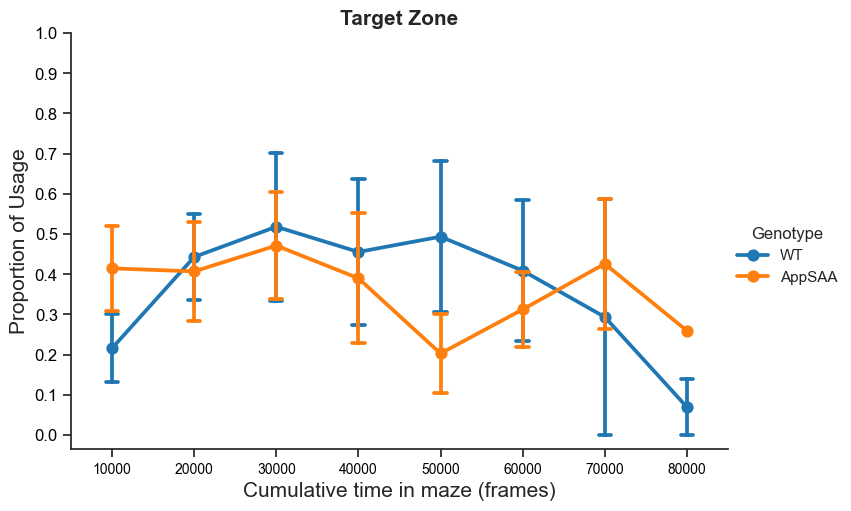

In [32]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_region_usage_over_bins


fig = plot_region_usage_over_bins(
    config=config,
    region_data=reg_binned,
    region_name=REGION,
    return_fig=True
)

### Statistical tests - region usage

In [33]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    run_region_usage_stats_mixedlm,
    run_region_usage_stats_fdr,
)


# Run a Mixed Effects Model
run_region_usage_stats_mixedlm(reg_binned, region_col=REGION)

# Run pairwise comparison across genotypes with FDR correction
fdr_results = run_region_usage_stats_fdr(reg_binned, region_col=REGION)


=== Mixed Effects Model (missing values preserved) ===
MixedLM error: endog has evaluated to an array with multiple columns that has shape (60, 50). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

=== Pairwise t-tests between Genotypes at each Bin (FDR corrected) ===
  Bin Group1 Group2     pval  pval_fdr  significant
10000     WT AppSAA 0.181946  0.748256        False
20000     WT AppSAA 0.831700  0.979204        False
30000     WT AppSAA 0.602365  0.963784        False
40000     WT AppSAA 0.594334  0.963784        False
50000     WT AppSAA 0.187064  0.748256        False
60000     WT AppSAA 0.445668  0.963784        False
70000     WT AppSAA 0.979204  0.979204        False
80000     WT AppSAA 0.884452  0.979204        False


## Plot 4: Proportion of usage across all Regions

Plot usage over time bins for all Regions:

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\all_regions_prop_usage.pdf


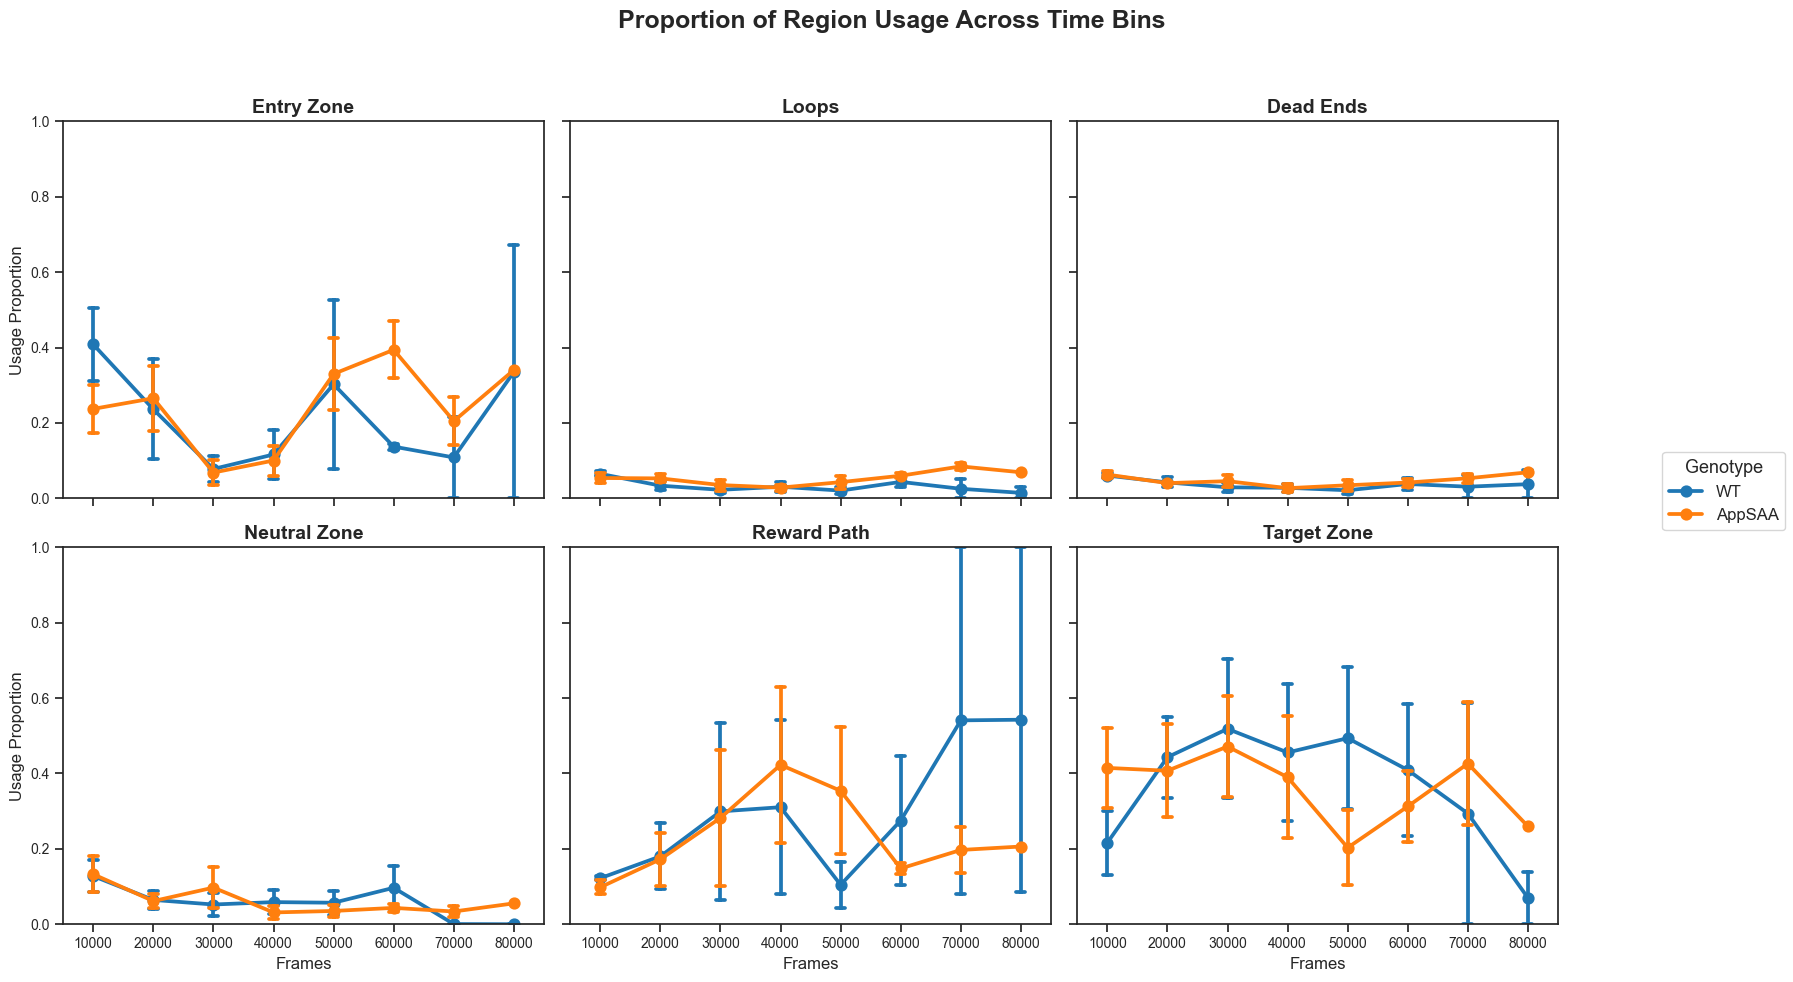

In [34]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_all_regions_usage_over_bins


region_list = ['entry_zone', 'loops','dead_ends', 'neutral_zone', 'reward_path', 'target_zone']

plot_all_regions_usage_over_bins(
    config=config,
    pivot_dict=pivot_dict,
    df_all_csv=df_all_csv,
    region_list=region_list,
    bin_size=BIN_SIZE,
)

# Bout-Level Success Metrics

## Plot 5: Cumulative Successful Bout Percentage

A bout is defined as a continuous sequence starting from the Entry Zone, passing through non-entry nodes, and returning to the Entry Zone. 

A successful bout is defined as one in which the animal reaches the Target Zone at least once before returning to the Entry Zone.

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\cumulative_successful_bouts.pdf


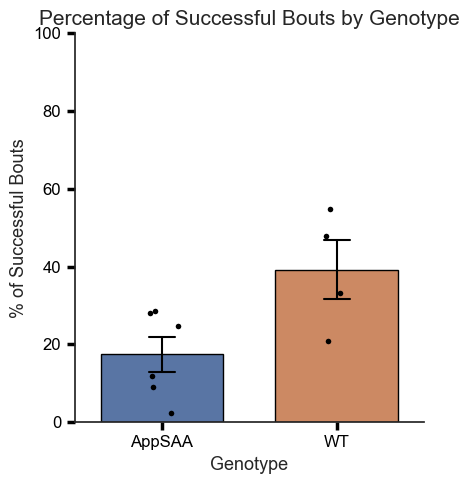

In [35]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    assign_bout_indices_from_entry_node,
    summarize_bout_success_by_session,
    plot_success_rate,
)


# 1. Assign bout indices to the navigation dataframe
df_all_csv_wbouts = assign_bout_indices_from_entry_node(df_all_csv)

# 2. Compute success summary statistics
bout_summary = summarize_bout_success_by_session(df_all_csv_wbouts)

# 3. Plot % of successful bouts per genotype
plot_success_rate(
    config=config,
    summary_table=bout_summary,
)

### Statistical tests - genotypes

Perform t-test on Success Rate:

In [36]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import perform_genotype_ttests


ttest_results_success = perform_genotype_ttests(bout_summary, rate_col='success_rate')
print("T-Test on Success Rate:")
for k, v in ttest_results_success.items():
    print(f"{k}: t={v['t_stat']:.3f}, p={v['p_value']:.4f}, mean1={v['mean_1']:.2f}, mean2={v['mean_2']:.2f}")

T-Test on Success Rate:
AppSAA vs WT: t=-2.462, p=0.0557, mean1=17.43, mean2=39.17


## Plot 6: Time-based Successful Bout Percentage

This function computes the percentage of successful bouts within sequential time bins across all sessions, allowing time-resolved assessment of goal-directed behavior.

### Recommended Use:
1. Ensure `df_all_csv` includes 'Session', 'Grid.Number', 'Bout_Index', and time-ordered rows.
2. Set `lower_succ_lim` and `upper_succ_lim` to define the full range of timepoints to analyze.
3. Set `diff_succ` as the size of each time bin (e.g., 5000).
4. Use `valid_bout_threshold` to exclude short bouts (e.g., < 19 steps).
5. Set `optimal_path_regions` to define which regions are required for optimal navigation.
6. Set `target_zone` to specify the region that marks a successful bout.

In [37]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import compute_binned_success_summary


# Set these values
BIN_SIZE = 5000
LOWER_BOUND = 0
UPPER_BOUND = 90000

summary_df = compute_binned_success_summary(
    df_all_csv=df_all_csv_wbouts,
    lower_succ_lim=LOWER_BOUND,
    upper_succ_lim=UPPER_BOUND,
    diff_succ=BIN_SIZE,
    valid_bout_threshold=19,
    optimal_path_regions=['entry_zone', 'reward_path', 'target_zone'],
    target_zone='target_zone'
)
summary_df

,Session,Genotype,Bout_num,No_of_Bouts,No_Valid_bouts,No_of_Succ_Bouts,No_of_perfect_bouts,Succ_bout_perc
0,2,AppSAA,5000,26,17,0,0,0.000000
1,2,AppSAA,10000,26,13,1,0,7.692308
2,2,AppSAA,15000,12,8,0,0,0.000000
3,2,AppSAA,20000,1,1,0,0,0.000000
4,2,AppSAA,25000,1,1,0,0,0.000000
...,...,...,...,...,...,...,...,...
166,11,WT,25000,14,7,3,0,42.857143
167,11,WT,30000,14,6,3,0,50.000000
168,11,WT,35000,13,8,4,0,50.000000
169,11,WT,40000,25,7,3,0,42.857143


Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\time_based_successful_bouts.pdf


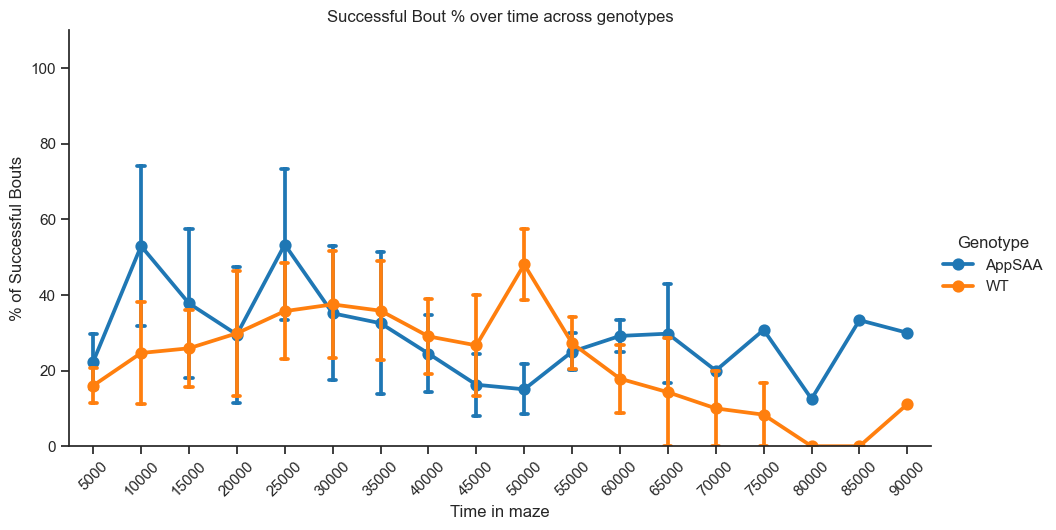

In [38]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_binned_success


# Visualize the percentage of successful bouts within each time bin
plot_binned_success(
    config=config,
    summary_df=summary_df,
)

### Statistical tests - time-based

In [39]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    run_mixedlm_with_nans,
    run_repeated_measures_anova,
    run_pairwise_comparisons,
)


# Run Mixed Linear Model (preserves NaNs)
#run_mixedlm_with_nans(summary_df)

# Run Repeated Measures ANOVA (NaNs filled with 0)
run_repeated_measures_anova(summary_df)

# Run Pairwise Comparisons (with FDR correction)
run_pairwise_comparisons(summary_df)


Running Repeated Measures ANOVA (NaNs filled with 0)...
ANOVA failed: Between subject effect not yet supported!

Running Pairwise Comparisons with Tukey HSD + FDR...
    group1 group2  meandiff   p-adj     lower     upper  reject  Bout_num  \
0   AppSAA     WT   -6.3175  0.5393  -29.0358   16.4009   False      5000   
1   AppSAA     WT  -28.2959  0.3494  -93.9459   37.3540   False     10000   
2   AppSAA     WT  -11.8717  0.6597  -71.7523   48.0089   False     15000   
3   AppSAA     WT    0.3373  0.9896  -58.8806   59.5552   False     20000   
4   AppSAA     WT  -17.6190  0.5082  -77.3771   42.1390   False     25000   
5   AppSAA     WT    2.3485  0.9237  -53.5607   58.2577   False     30000   
6   AppSAA     WT    3.3081  0.8950  -53.8576   60.4738   False     35000   
7   AppSAA     WT    4.5527  0.7604  -29.3970   38.5023   False     40000   
8   AppSAA     WT    3.7409  0.7932  -28.7438   36.2256   False     45000   
9   AppSAA     WT   33.0128  0.0249    5.8395   60.1861    True

# Plot 7: Deviation from Reward Path and Velocity

This function filters, normalizes, and smooths deviation and velocity values for the specified genotype, and fits exponential curves to the processed data.

### Recommended Use:
1. Ensure `df_deviation` includes 'Ind_no', 'Genotype', 'Deviation', and 'Velocity' columns.
2. Set `genotype` to filter the group of interest (e.g., 'WT-WT').

In [40]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import (
    ensure_velocity_column,
    ensure_bout_indices,
    compute_deviation_velocity,
    process_deviation_velocity,
)


GENOTYPE = 'WT'

# Ensures velocity column exists
df_all_csv_wvelocity = ensure_velocity_column(
    df=df_all_csv,
    frame_rate=5.0,
)

# Ensure Bout Index column Bout_ID exists
df_all_csv_wbouts = ensure_bout_indices(
    df=df_all_csv_wvelocity,
    delimiter_node=47,
)

# Compute deviation and velocity per bout
df_deviation = compute_deviation_velocity(df_all_csv_wbouts)

# Process deviation and velocity (normalize, smooth, fit curves)
df_processed, params_dev, params_vel = process_deviation_velocity(
    index_df=df_deviation,
    genotype=GENOTYPE,
)

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\WT_deviation_velocity_metric.pdf


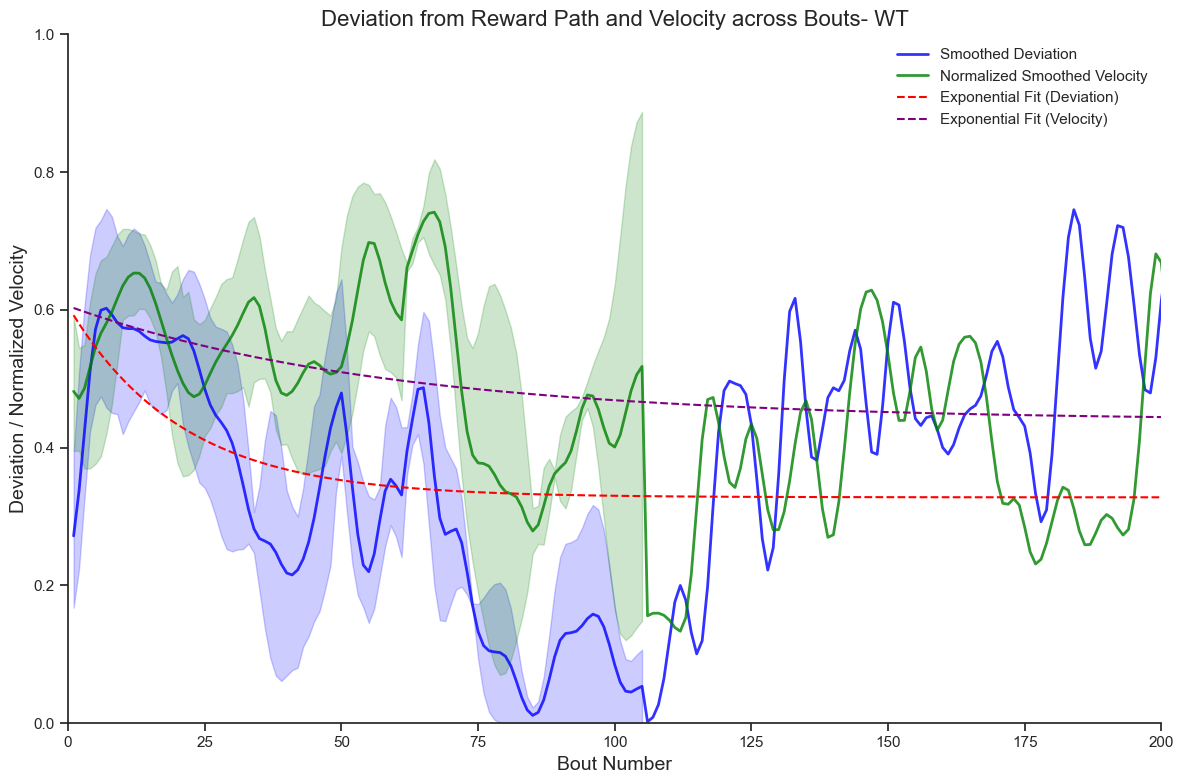

In [41]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_deviation_velocity_fit


# Plots smoothed deviation and normalized velocity trajectories across bouts, overlaid with exponential fit curves
plot_deviation_velocity_fit(
    config=config,
    df=df_processed,
    params_dev=params_dev,
    params_vel=params_vel,
    genotype=GENOTYPE,
    max_bouts=200,
)

### Deviation from Reward Path and Velocity for all Genotypes

Plot Deviation-Velocity plots for all genotypes

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\all_genotypes_deviation_velocity_metric.pdf


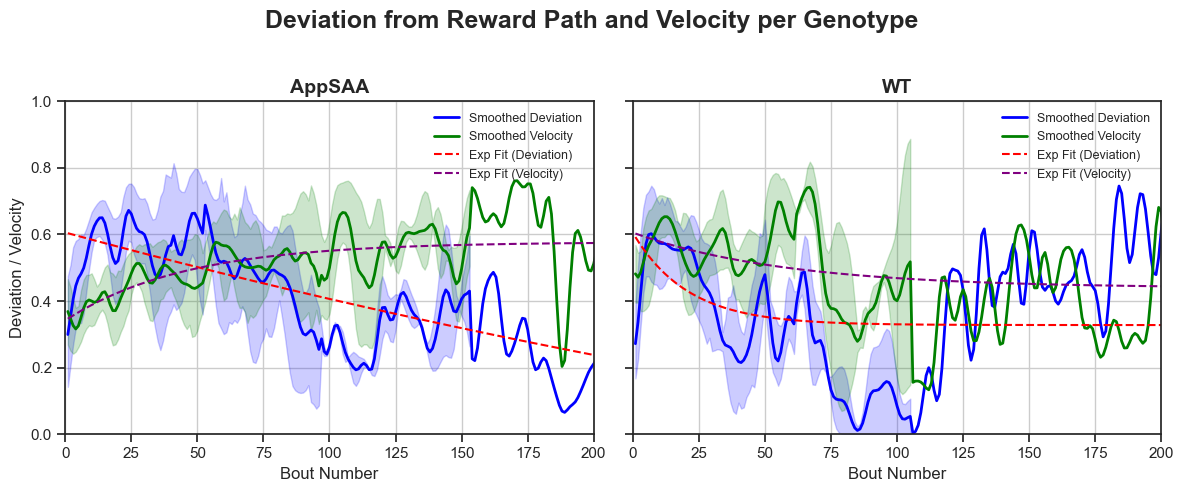

In [42]:
from compass_labyrinth.behavior.behavior_metrics.task_performance_analysis import plot_deviation_velocity_all


plot_deviation_velocity_all(
    config=config,
    index_df=df_deviation,
    max_bouts=200,
)